# Football Data Mining: Predicting Results of La Liga

This Project is about predicting football results with indicators calculated with past results and statistics of La Liga Santander and La Liga Smartbank.
I did it based on this project from Univerity of Manitoba, Canada:(https://www.sciencedirect.com/science/article/pii/S1877050914011181)
I got the football data on this website:
(http://www.football-data.co.uk/data.php)

Let's start importing the libraries:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data from La Liga Santander
df_liga1 = pd.read_csv('DatosLaLiga.csv')
#Data from La Liga SmartBank
df_liga2= pd.read_csv('DatosSegunda.csv')

In [3]:
#Let's take the fields that we need from both Data frames
df1=df_liga1[['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR']]
df2=df_liga2[['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR']]

Explanation about every field, if necessary:
&nbsp;

-Div: Division &nbsp;

-Date &nbsp;

-Home Team &nbsp;

-Away Team &nbsp;

-FTHG: Final Time Home Team Goals &nbsp;

-FTAG: Final Time Away Team Goals &nbsp;

-FTR: Final Time Result &nbsp;

-HTHG: Half Time Home Team Goals &nbsp;

-HTAG: Half Time Away Team Goals &nbsp;

-HTR: Half Time Result &nbsp;

-HS: Home Team Shots &nbsp;

-As: Away Team Shots &nbsp;

-HST: Home Team Shots on Target &nbsp;

-AST: Away Team Shots on Target &nbsp;

-HF: Home Team Fouls &nbsp;

-AF: Away Team Fouls &nbsp;

-HC: Home Team Corners &nbsp;

-AC: Away Team Corners &nbsp;

-HY: Home Team Yellows &nbsp;

-AY: Away Team Yellows &nbsp;

-HR: Home Team Reds &nbsp;

-AR: Away Team Reds &nbsp;

In [4]:
df1.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.479624,1.018809,0.620690,0.432602,12.717868,10.000000,4.438871,3.416928,13.689655,13.915361,5.225705,4.178683,2.554859,2.695925,0.081505,0.134796
std,1.210044,1.002963,0.852491,0.640118,4.798653,4.095557,2.516960,1.929210,4.162681,3.981370,2.693896,2.303139,1.538592,1.472499,0.306537,0.351116
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,11.000000,11.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,13.000000,14.000000,5.000000,4.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,12.000000,6.000000,5.000000,16.000000,17.000000,7.000000,6.000000,4.000000,4.000000,0.000000,0.000000
max,6.000000,5.000000,4.000000,3.000000,25.000000,24.000000,17.000000,11.000000,28.000000,30.000000,14.000000,11.000000,7.000000,8.000000,2.000000,2.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       319 non-null    object
 1   Date      319 non-null    object
 2   HomeTeam  319 non-null    object
 3   AwayTeam  319 non-null    object
 4   FTHG      319 non-null    int64 
 5   FTAG      319 non-null    int64 
 6   FTR       319 non-null    object
 7   HTHG      319 non-null    int64 
 8   HTAG      319 non-null    int64 
 9   HTR       319 non-null    object
 10  HS        319 non-null    int64 
 11  AS        319 non-null    int64 
 12  HST       319 non-null    int64 
 13  AST       319 non-null    int64 
 14  HF        319 non-null    int64 
 15  AF        319 non-null    int64 
 16  HC        319 non-null    int64 
 17  AC        319 non-null    int64 
 18  HY        319 non-null    int64 
 19  AY        319 non-null    int64 
 20  HR        319 non-null    int64 
 21  AR        319 no

After that explanation, I'm going to calculate the weigth of each field  from offensive and defensive point of view with the help of PCA algorithm. But before of that, I'm going to concatenate offensives and defensive Data frames and  sort the stats by the correlation with goals.


In [6]:
#Offensive stats
r1ho=df1[['HS','HST','AF','AY','AR','HC','FTHG']]
r1ao=df1[['AS','AST','HF','HY','HR','AC','FTAG']]
r2ho=df2[['HS','HST','AF','AY','AR','HC','FTHG']]
r2ao=df2[['AS','AST','HF','HY','HR','AC','FTAG']]

In [7]:
r1ho.rename(columns={'HS':'S','HST':'ST','AF':'F','AY':'Y','AR':'R','HC':'C','FTHG':'FTG'}, inplace=True)
r2ho.rename(columns={'HS':'S','HST':'ST','AF':'F','AY':'Y','AR':'R','HC':'C','FTHG':'FTG'}, inplace=True)
r1ao.rename(columns={'AS':'S','AST':'ST','HF':'F','HY':'Y','HR':'R','AC':'C','FTAG':'FTG'}, inplace=True)
r2ao.rename(columns={'AS':'S','AST':'ST','HF':'F','HY':'Y','HR':'R','AC':'C','FTAG':'FTG'}, inplace=True)

In [8]:
rto=pd.concat([r1ho,r1ao,r2ho,r2ao])

In [9]:
rto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 393
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S       1426 non-null   int64
 1   ST      1426 non-null   int64
 2   F       1426 non-null   int64
 3   Y       1426 non-null   int64
 4   R       1426 non-null   int64
 5   C       1426 non-null   int64
 6   FTG     1426 non-null   int64
dtypes: int64(7)
memory usage: 89.1 KB


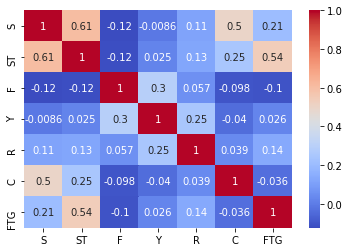

In [10]:
sns.heatmap(rto.corr(),cmap='coolwarm',annot=True)

In [11]:
rto.columns

Index(['S', 'ST', 'F', 'Y', 'R', 'C', 'FTG'], dtype='object')

In [12]:
#Offensive stats that we order by correlation with goals scored
rto=rto[['FTG','ST', 'S', 'R', 'Y', 'C', 'F']]

In [13]:
scaler = StandardScaler()
scaler.fit(rto)
scaled_data_off = scaler.transform(rto)
pca_off = PCA(n_components=7)

In [14]:
pca_off.fit_transform(scaled_data_off)

array([[ 0.16861524, -1.53779777, -0.92610632, ..., -0.0696413 ,
        -0.68660864,  0.41776218],
       [ 0.14442485,  0.40930491, -0.08253498, ...,  0.84241217,
         0.57964896,  0.89974081],
       [ 0.60346281,  0.41224823, -0.23123701, ..., -0.89459167,
        -1.05203433,  0.28394143],
       ...,
       [-2.63066145,  4.10124278,  0.65202838, ...,  0.751174  ,
        -0.35421477,  0.11362926],
       [-0.86674691,  0.67634471,  1.20683828, ..., -0.31695885,
        -0.29519173,  0.14793676],
       [-0.15321911, -1.3956726 , -1.23776471, ...,  0.95529244,
        -1.26050375,  0.15641677]])

In [15]:
print('Offensives weights for each stat:',pca_off.explained_variance_ratio_)

Offensives weights for each stat: [0.31088906 0.20460445 0.16327661 0.12329211 0.09133258 0.06778108
 0.03882411]


In [16]:
#Defensive stats
r1hd=df1[['AS','AST','HF','HY','HR','AC','FTAG']]
r2hd=df2[['AS','AST','HF','HY','HR','AC','FTAG']]
r1ad=df1[['HS','HST','AF','AY','AR','HC','FTHG']]
r2ad=df2[['HS','HST','AF','AY','AR','HC','FTHG']]

In [17]:
r1hd.rename(columns={'AS':'S','AST':'ST','HF':'F','HY':'Y','HR':'R','AC':'C','FTAG':'FTG'}, inplace=True)
r2hd.rename(columns={'AS':'S','AST':'ST','HF':'F','HY':'Y','HR':'R','AC':'C','FTAG':'FTG'}, inplace=True)
r1ad.rename(columns={'HS':'S','HST':'ST','AF':'F','AY':'Y','AR':'R','HC':'C','FTHG':'FTG'}, inplace=True)
r2ad.rename(columns={'HS':'S','HST':'ST','AF':'F','AY':'Y','AR':'R','HC':'C','FTHG':'FTG'}, inplace=True)

In [18]:
rtd=pd.concat([r1hd,r1ad,r2hd,r2ad])

In [19]:
rtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 393
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S       1426 non-null   int64
 1   ST      1426 non-null   int64
 2   F       1426 non-null   int64
 3   Y       1426 non-null   int64
 4   R       1426 non-null   int64
 5   C       1426 non-null   int64
 6   FTG     1426 non-null   int64
dtypes: int64(7)
memory usage: 89.1 KB


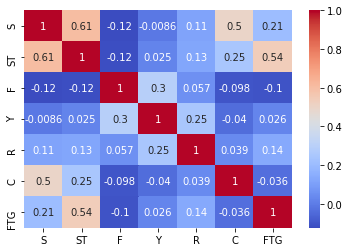

In [20]:
sns.heatmap(rtd.corr(),cmap='coolwarm',annot=True)

In [21]:
##Defensive stats that we order by correlation with goals scored
rtd=rtd[['FTG','ST', 'S', 'R', 'Y', 'C', 'F']]

In [22]:
scaler = StandardScaler()
scaler.fit(rtd)
scaled_data_def = scaler.transform(rtd)
pca_def= PCA(n_components=7)

In [23]:
pca_def.fit_transform(scaled_data_def)

array([[-0.4901011 , -1.49508542,  1.45444968, ...,  0.51345868,
         0.49265725,  0.0610127 ],
       [ 3.08268404,  1.57054966, -1.13979869, ..., -0.90189169,
        -0.73386179,  0.88983744],
       [ 0.02506871,  1.53311161, -0.14815622, ...,  0.0066621 ,
        -0.53044558, -0.31508184],
       ...,
       [-0.05529873,  1.84393991, -0.96341456, ...,  2.06535944,
        -0.13679252, -0.11164552],
       [-0.3610881 ,  0.15850023, -0.43267779, ...,  1.48758641,
        -0.32841432, -0.46950391],
       [-0.36816904, -1.1494796 , -0.91641355, ...,  0.31619654,
        -0.77233347,  0.02045353]])

In [24]:
print('Defensives weights for each stat:',pca_def.explained_variance_ratio_)

Defensives weights for each stat: [0.31088906 0.20460445 0.16327661 0.12329211 0.09133258 0.06778108
 0.03882411]


After calculate the needed weights to ponderate the offensive and defensive strategy,we create the Data Frames from first and second league, from the point of view of the local and the away team, Offensively and Defensively:

In [25]:
ofsth1=df1[['HS','HST','AF','AY','AR','HC','FTHG']]
ofsta1=df1[['AS','AST','HF','HY','HR','AC','FTAG']]
defsth1=df1[['AS','AST','HF','HY','HR','AC','FTAG']]
defsta1=df1[['HS','HST','AF','AY','AR','HC','FTHG']]
ofsth2=df2[['HS','HST','AF','AY','AR','HC','FTHG']]
ofsta2=df2[['AS','AST','HF','HY','HR','AC','FTAG']]
defsth2=df2[['AS','AST','HF','HY','HR','AC','FTAG']]
defsta2=df2[['HS','HST','AF','AY','AR','HC','FTHG']]

First Indicator that we calculate is Off_Strategy. With this indicator we want to qualify every offensive stat that we got in reference to the average in the league with tolerance of 1,96 times the standard deviation. That's because, We consider the 95% confidence interval of the mean.

<a href="https://www.codecogs.com/eqnedit.php?latex=\mu&space;=&space;\chi&space;\pm&space;1,96&space;\sigma" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mu&space;=&space;\chi&space;\pm&space;1,96&space;\sigma" title="\mu = \chi \pm 1,96 \sigma" /></a>

After that qualify of every stat, we calculate the final qualification with the weights that we calculate before.

We are going to consider only the last 3 matches to rate the current moment of strength of the teams.

We are going to do the same method with defensives stats to calculate Def_Strategy.


In [26]:
def Off_Strategy(Team,df,ofsth,ofsta):
    df_last3=df[(df['HomeTeam']==Team) | (df['AwayTeam']==Team)].tail(3)
    #Goals score
    def NG(Team):
        HG=df_last3[df_last3['HomeTeam']==Team]['FTHG'].tolist()
        i=0
        list_HG=[]
        while i<len(HG):
            inf=ofsth['FTHG'].mean()-1.96*ofsth['FTHG'].std()
            if inf<0:
                inf=0
            r=HG[i]/(((ofsth['FTHG'].mean()+1.96*ofsth['FTHG'].std())-(inf))/10)
            if r>10:
                r=10
            list_HG.append(r)
            i=i+1
        AG=df_last3[df_last3['AwayTeam']==Team]['FTAG'].tolist()
        n=0
        list_AG=[]
        while n<len(AG):
            inf=ofsta['FTAG'].mean()-1.96*ofsta['FTAG'].std()
            if inf<0:
                inf=0
            r=AG[n]/(((ofsta['FTAG'].mean()+1.96*ofsta['FTAG'].std())-(inf))/10)
            if r>10:
                r=10
            list_AG.append(r)
            n=n+1
        list_G=list_HG+list_AG
        NG=sum(list_G)/len(list_G)
        return NG

    #Total shots score
    def NS(Team):
        HS=df_last3[df_last3['HomeTeam']==Team]['HS'].tolist()
        i=0
        list_HS=[]
        while i<len(HS):
            inf=ofsth['HS'].mean()-1.96*ofsth['HS'].std()
            if inf<0:
                inf=0
            r=HS[i]/(((ofsth['HS'].mean()+1.96*ofsth['HS'].std())-(inf))/10)
            if r>10:
                r=10
            list_HS.append(r)
            i=i+1
        AS=df_last3[df_last3['AwayTeam']==Team]['AS'].tolist()
        n=0
        list_AS=[]
        while n<len(AS):
            inf=ofsta['AS'].mean()-1.96*ofsta['AS'].std()
            if inf<0:
                inf=0
            r=AS[n]/(((ofsta['AS'].mean()+1.96*ofsta['AS'].std())-(inf))/10)
            if r>10:
                r=10
            list_AS.append(r)
            n=n+1
        list_S=list_HS+list_AS
        NS=sum(list_S)/len(list_S)
        return NS

    #Total shots on target score
    def NST(Team):
        HST=df_last3[df_last3['HomeTeam']==Team]['HST'].tolist()
        i=0
        list_HST=[]
        while i<len(HST):
            inf=ofsth['HST'].mean()-1.96*ofsth['HST'].std()
            if inf<0:
                inf=0
            r=HST[i]/(((ofsth['HST'].mean()+1.96*ofsth['HST'].std())-(inf))/10)
            if r>10:
                r=10
            list_HST.append(r)
            i=i+1
        AST=df_last3[df_last3['AwayTeam']==Team]['AST'].tolist()
        n=0
        list_AST=[]
        while n<len(AST):
            inf=ofsta['AST'].mean()-1.96*ofsta['AST'].std()
            if inf<0:
                inf=0
            r=AST[n]/(((ofsta['AST'].mean()+1.96*ofsta['AST'].std())-(inf))/10)
            if r>10:
                r=10
            list_AST.append(r)
            n=n+1
        list_ST=list_HST+list_AST
        NST=sum(list_ST)/len(list_ST)
        return NST

    #fouls received score
    def NOF (Team):    
        AFO=df_last3[df_last3['HomeTeam']==Team]['AF'].tolist()
        i=0
        list_AFO=[]
        while i<len(AFO):
            inf=ofsth['AF'].mean()-1.96*ofsth['AF'].std()
            if inf<0:
                inf=0
            r=AFO[i]/(((ofsth['AF'].mean()+1.96*ofsth['AF'].std())-(inf))/10)
            if r>10:
                r=10
            list_AFO.append(r)
            i=i+1
        HFO=df_last3[df_last3['AwayTeam']==Team]['HF'].tolist()
        n=0
        list_HFO=[]
        while n<len(HFO):
            inf=ofsta['HF'].mean()-1.96*ofsta['HF'].std()
            if inf<0:
                inf=0
            r=HFO[n]/(((ofsta['HF'].mean()+1.96*ofsta['HF'].std())-(inf))/10)
            if r>10:
                r=10
            list_HFO.append(r)
            n=n+1
        list_OF=list_HFO+list_AFO
        NOF=sum(list_OF)/len(list_OF)
        return NOF

    #Yellows received score
    def NOY (Team):  
        AYO=df_last3[df_last3['HomeTeam']==Team]['AY'].tolist()
        i=0
        list_AYO=[]
        while i<len(AYO):
            inf=ofsth['AY'].mean()-1.96*ofsth['AY'].std()
            if inf<0:
                inf=0
            r=AYO[i]/(((ofsth['AY'].mean()+1.96*ofsth['AY'].std())-(inf))/10)
            if r>10:
                r=10
            list_AYO.append(r)
            i=i+1
        HYO=df_last3[df_last3['AwayTeam']==Team]['HY'].tolist()
        n=0
        list_HYO=[]
        while n<len(HYO):
            inf=ofsta['HY'].mean()-1.96*ofsta['HY'].std()
            if inf<0:
                inf=0
            r=HYO[n]/(((ofsta['HY'].mean()+1.96*ofsta['HY'].std())-(inf))/10)
            if r>10:
                r=10
            list_HYO.append(r)
            n=n+1
        list_OY=list_HYO+list_AYO
        NOY=sum(list_OY)/len(list_OY)
        return NOY

    #Reds received score
    def NOR (Team):      
        ARO=df_last3[df_last3['HomeTeam']==Team]['AR'].tolist()
        i=0
        list_ARO=[]
        while i<len(ARO):
            inf=ofsth['AR'].mean()-1.96*ofsth['AR'].std()
            if inf<0:
                inf=0
            r=ARO[i]/(((ofsth['AR'].mean()+1.96*ofsth['AR'].std())-(inf))/10)
            if r>10:
                r=10
            list_ARO.append(r)
            i=i+1
        HRO=df_last3[df_last3['AwayTeam']==Team]['HR'].tolist()
        n=0
        list_HRO=[]
        while n<len(HRO):
            inf=ofsta['HR'].mean()-1.96*ofsta['HR'].std()
            if inf<0:
                inf=0
            r=HRO[n]/(((ofsta['HR'].mean()+1.96*ofsta['HR'].std())-(inf))/10)
            if r>10:
                r=10
            list_HRO.append(r)
            n=n+1
        list_OR=list_HRO+list_ARO
        NOR=sum(list_OR)/len(list_OR)
        return NOR

    #Corners score
    def NC (Team):    
        HC=df_last3[df_last3['HomeTeam']==Team]['HC'].tolist()
        i=0
        list_HC=[]
        while i<len(HC):
            inf=ofsth['HC'].mean()-1.96*ofsth['HC'].std()
            if inf<0:
                inf=0
            r=HC[i]/(((ofsth['HC'].mean()+1.96*ofsth['HC'].std())-(inf))/10)
            if r>10:
                r=10
            list_HC.append(r)
            i=i+1
        AC=df_last3[df_last3['AwayTeam']==Team]['AC'].tolist()
        n=0
        list_AC=[]
        while n<len(AC):
            inf=ofsta['AC'].mean()-1.96*ofsta['AC'].std()
            if inf<0:
                inf=0
            r=AC[n]/(((ofsta['AC'].mean()+1.96*ofsta['AC'].std())-(inf))/10)
            if r>10:
                r=10
            list_AC.append(r)
            n=n+1
        list_C=list_HC+list_AC
        NC=sum(list_C)/len(list_C)
        return NC
    Off_S=(0.31*NG(Team)+0.2*NST(Team)+0.16*NS(Team)+0.13*NOR(Team)+0.09*NOY(Team)+0.07*NC(Team)+0.04*NOF(Team))*(50/10)
    return Off_S

In [27]:
def Def_Strategy(Team,df,defsth,defsta):
    
    df_last3=df[(df['HomeTeam']==Team) | (df['AwayTeam']==Team)].tail(3)

    #Goals received score
    def NGO(Team):
        HGO=df_last3[df_last3['HomeTeam']==Team]['FTAG'].tolist()
        i=0
        list_HGO=[]
        while i<len(HGO):
            inf=defsth['FTAG'].mean()-1.96*defsth['FTAG'].std()
            if inf<0:
                inf=0
            r=HGO[i]/(((defsth['FTAG'].mean()+1.96*defsth['FTAG'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HGO.append(s)
            i=i+1
        AGO=df_last3[df_last3['AwayTeam']==Team]['FTHG'].tolist()
        n=0
        list_AGO=[]
        while n<len(AGO):
            inf=defsta['FTHG'].mean()-1.96*defsta['FTHG'].std()
            if inf<0:
                inf=0
            r=AGO[n]/(((defsta['FTHG'].mean()+1.96*defsta['FTHG'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_AGO.append(s)
            n=n+1
        list_GO=list_HGO+list_AGO
        NGO=sum(list_GO)/len(list_GO)
        return NGO

    #Total shots received score
    def NSO(Team):          
        HSO=df_last3[df_last3['HomeTeam']==Team]['AS'].tolist()
        i=0
        list_HSO=[]
        while i<len(HSO):
            inf=defsth['AS'].mean()-1.96*defsth['AS'].std()
            if inf<0:
                inf=0
            r=HSO[i]/(((defsth['AS'].mean()+1.96*defsth['AS'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HSO.append(s)
            i=i+1
        ASO=df_last3[df_last3['AwayTeam']==Team]['HS'].tolist()
        n=0
        list_ASO=[]
        while n<len(ASO):
            inf=defsta['HS'].mean()-1.96*defsta['HS'].std()
            if inf<0:
                inf=0
            r=ASO[n]/(((defsta['HS'].mean()+1.96*defsta['HS'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_ASO.append(s)
            n=n+1
        list_SO=list_HSO+list_ASO
        NSO=sum(list_SO)/len(list_SO)
        return NSO

    #Total shots on target received score
    def NSTO(Team):       
        HSTO=df_last3[df_last3['HomeTeam']==Team]['AST'].tolist()
        i=0
        list_HSTO=[]
        while i<len(HSTO):
            inf=defsth['AST'].mean()-1.96*defsth['AST'].std()
            if inf<0:
                inf=0
            r=HSTO[i]/(((defsth['AST'].mean()+1.96*defsth['AST'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HSTO.append(s)
            i=i+1
        ASTO=df_last3[df_last3['AwayTeam']==Team]['HST'].tolist()
        n=0
        list_ASTO=[]
        while n<len(ASTO):
            inf=defsta['HST'].mean()-1.96*defsta['HST'].std()
            if inf<0:
                inf=0
            r=ASTO[n]/(((defsta['HST'].mean()+1.96*defsta['HST'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_ASTO.append(s)
            n=n+1
        list_STO=list_HSTO+list_ASTO
        NSTO=sum(list_STO)/len(list_STO)
        return NSTO

    #Fouls score
    def NF(Team): 
        HF=df_last3[df_last3['HomeTeam']==Team]['HF'].tolist()
        i=0
        list_HF=[]
        while i<len(HF):
            inf=defsth['HF'].mean()-1.96*defsth['HF'].std()
            if inf<0:
                inf=0
            r=HF[i]/(((defsth['HF'].mean()+1.96*defsth['HF'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HF.append(s)
            i=i+1
        AF=df_last3[df_last3['AwayTeam']==Team]['AF'].tolist()
        n=0
        list_AF=[]
        while n<len(AF):
            inf=defsta['AF'].mean()-1.96*defsta['AF'].std()
            if inf<0:
                inf=0
            r=AF[n]/(((defsta['AF'].mean()+1.96*defsta['AF'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_AF.append(s)
            n=n+1
        list_F=list_HF+list_AF
        NF=sum(list_F)/len(list_F)
        return NF

    #Yellows score
    def NY(Team): 
        HY=df_last3[df_last3['HomeTeam']==Team]['HY'].tolist()
        i=0
        list_HY=[]
        while i<len(HY):
            inf=defsth['HY'].mean()-1.96*defsth['HY'].std()
            if inf<0:
                inf=0
            r=HY[i]/(((defsth['HY'].mean()+1.96*defsth['HY'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HY.append(s)
            i=i+1
        AY=df_last3[df_last3['AwayTeam']==Team]['AY'].tolist()
        n=0
        list_AY=[]
        while n<len(AY):
            inf=defsta['AY'].mean()-1.96*defsta['AY'].std()
            if inf<0:
                inf=0
            r=AY[n]/(((defsta['AY'].mean()+1.96*defsta['AY'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_AY.append(s)
            n=n+1
        list_Y=list_HY+list_AY
        NY=sum(list_Y)/len(list_Y)
        return NY

    #Reds score
    def NR(Team): 
        HR=df_last3[df_last3['HomeTeam']==Team]['HR'].tolist()
        i=0
        list_HR=[]
        while i<len(HR):
            inf=defsth['HR'].mean()-1.96*defsth['HR'].std()
            if inf<0:
                inf=0
            r=HR[i]/(((defsth['HR'].mean()+1.96*defsth['HR'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HR.append(s)
            i=i+1
        AR=df_last3[df_last3['AwayTeam']==Team]['AR'].tolist()
        n=0
        list_AR=[]
        while n<len(AR):
            inf=defsta['AR'].mean()-1.96*defsta['AR'].std()
            if inf<0:
                inf=0
            r=AR[n]/(((defsta['AR'].mean()+1.96*defsta['AR'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_AR.append(s)
            n=n+1
        list_R=list_HR+list_AR
        NR=sum(list_R)/len(list_R)
        return NR
    #Corners received score
    def NCO(Team): 
        HCO=df_last3[df_last3['HomeTeam']==Team]['AC'].tolist()
        i=0
        list_HCO=[]
        while i<len(HCO):
            inf=defsth['AC'].mean()-1.96*defsth['AC'].std()
            if inf<0:
                inf=0
            r=HCO[i]/(((defsth['AC'].mean()+1.96*defsth['AC'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_HCO.append(s)
            i=i+1
        ACO=df_last3[df_last3['AwayTeam']==Team]['HC'].tolist()
        n=0
        list_ACO=[]
        while n<len(ACO):
            inf=defsta['HC'].mean()-1.96*defsta['HC'].std()
            if inf<0:
                inf=0
            r=ACO[n]/(((defsta['HC'].mean()+1.96*defsta['HC'].std())-(inf))/10)
            if r>10:
                r=10
            s=10-r
            list_ACO.append(s)
            n=n+1
        list_CO=list_HCO+list_ACO
        NCO=sum(list_CO)/len(list_CO)
        return NCO
    
    Def_S=(0.31*NGO(Team)+0.2*NSTO(Team)+0.16*NSO(Team)+0.13*NR(Team)+0.09*NY(Team)+0.07*NCO(Team)+0.04*NF(Team))*(50/10)
                
    return Def_S

Now we are going to calculate Pythagorean wins, an indicator calculated with Total Goals scored in the league(PF) and Total Goals received in the league (PA) with the following function:
<a href="https://www.codecogs.com/eqnedit.php?latex=Pyth&space;Wins&space;=&space;PF^{2,37}/\left&space;(&space;PF^{2,37}&plus;PA^{2,37}&space;\right&space;)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Pyth&space;Wins&space;=&space;PF^{2,37}/\left&space;(&space;PF^{2,37}&plus;PA^{2,37}&space;\right&space;)" title="Pyth Wins = PF^{2,37}/\left ( PF^{2,37}+PA^{2,37} \right )" /></a>


In [28]:
def Pyth_win(Team,df):
    df_liga=df[(df['HomeTeam']==Team) | (df['AwayTeam']==Team)]
    PFH=df_liga[df_liga['HomeTeam']==Team]['FTHG'].sum()
    PFA=df_liga[df_liga['AwayTeam']==Team]['FTAG'].sum()
    PF=PFH+PFA
    PAH=df_liga[df_liga['HomeTeam']==Team]['FTAG'].sum()
    PAA=df_liga[df_liga['AwayTeam']==Team]['FTHG'].sum()
    PA=PAH+PAA
    Pyth_win=((PF**2.37)/(PF**2.37+PA**2.37))*100
    return Pyth_win

Finally the last indicator that we are going to calculate is RPI, that depends of the winrate,the schedule overcome by opponent Team and the schedule overcome by opponents of opponent team. There is a better explanation about this indicator on the page 4 in the project of the University of Manitova, Canada (https://www.sciencedirect.com/science/article/pii/S1877050914011181).

<a href="https://www.codecogs.com/eqnedit.php?latex=RPI=(0,25\cdot&space;WP)&plus;(0,5\cdot&space;OR)&plus;(0,25\cdot&space;OOR)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?RPI=(0,25\cdot&space;WP)&plus;(0,5\cdot&space;OR)&plus;(0,25\cdot&space;OOR)" title="RPI=(0,25\cdot WP)+(0,5\cdot OR)+(0,25\cdot OOR)" /></a>

In [29]:
def winp(Team,df):
    df_liga=df[(df['HomeTeam']==Team) | (df['AwayTeam']==Team)]
    WH=df_liga[(df_liga['HomeTeam']==Team) & (df_liga['FTR']=='H')]['FTR'].count()
    DH=df_liga[(df_liga['HomeTeam']==Team) & (df_liga['FTR']=='D')]['FTR'].count()
    WA=df_liga[(df_liga['AwayTeam']==Team) & (df_liga['FTR']=='A')]['FTR'].count()
    DA=df_liga[(df_liga['AwayTeam']==Team) & (df_liga['FTR']=='D')]['FTR'].count()
    TM=df_liga['FTR'].count()
    WP=(WH*3+WA*3+DH+DA)/(TM*3)
    return WP

In [30]:
def OR(Team,df):
    OTH=df[df['HomeTeam']==Team]['AwayTeam'].tolist()
    OTA=df[df['AwayTeam']==Team]['HomeTeam'].tolist()
    OT=OTH+OTA
    df_ot=pd.DataFrame()
    df_ot['OT']=OT
    df_ot['OTWP']=df_ot['OT'].apply(lambda x:winp(x,df))
    ORT=df_ot['OTWP'].mean()
    return ORT

In [31]:
def OOR(Team,df):
    OTH=df[df['HomeTeam']==Team]['AwayTeam'].tolist()
    OTA=df[df['AwayTeam']==Team]['HomeTeam'].tolist()
    OT=OTH+OTA
    df_ot=pd.DataFrame()
    df_ot['OT']=OT
    df_ot['OTOR']=df_ot['OT'].apply(lambda x:OR(x,df))
    OORT=df_ot['OTOR'].mean()
    return OORT

In [32]:
def RPI(Team,df):
    RPI=(0.25*winp(Team,df)+0.5*OR(Team,df)+0.25*OOR(Team,df))*150
    return RPI

Every indicator has a weigth on the final calculation based on the Project of University of Manitoba, so Off_Strategy and Def_Strategy have a maximum of 50 points, Pyth_wins has a maximum if 100 points and RPI has a maximum of 150 points.

After calculate every indicator, we are going to put into practice with 15 matches of one football jorney from both leagues("La Quiniela").


In [33]:
df_quini1=pd.DataFrame()
df_quini2=pd.DataFrame()

In [34]:
sorted(df1['HomeTeam'].unique())

['Alaves',
 'Ath Bilbao',
 'Ath Madrid',
 'Barcelona',
 'Betis',
 'Celta',
 'Eibar',
 'Espanol',
 'Getafe',
 'Granada',
 'Leganes',
 'Levante',
 'Mallorca',
 'Osasuna',
 'Real Madrid',
 'Sevilla',
 'Sociedad',
 'Valencia',
 'Valladolid',
 'Villarreal']

The following list are the local and away teams from La Liga Santander(First League):

In [35]:
list_locales1=['Leganes','Mallorca','Barcelona','Alaves','Valencia','Valladolid','Betis','Sociedad','Eibar','Real Madrid']
list_visitantes1=['Sevilla','Celta','Ath Madrid','Granada','Ath Bilbao','Levante','Villarreal','Espanol','Osasuna','Getafe']

In [36]:
sorted(df2['HomeTeam'].unique())

['Albacete',
 'Alcorcon',
 'Almeria',
 'Cadiz',
 'Elche',
 'Extremadura UD',
 'Fuenlabrada',
 'Girona',
 'Huesca',
 'La Coruna',
 'Las Palmas',
 'Lugo',
 'Malaga',
 'Mirandes',
 'Numancia',
 'Oviedo',
 'Ponferradina',
 'Santander',
 'Sp Gijon',
 'Tenerife',
 'Vallecano',
 'Zaragoza']

The following list are the local and away teams from La Liga SmartBank(Second League):

In [37]:
list_locales2=['Elche','Oviedo','Almeria','Huesca','Vallecano']
list_visitantes2=['Cadiz','Mirandes','Sp Gijon','Las Palmas','Malaga']

In [38]:
df_quini1['Local']=list_locales1
df_quini1['Visitante']=list_visitantes1
df_quini2['Local']=list_locales2
df_quini2['Visitante']=list_visitantes2

Now we are going to calculate every indicator for every football match:

In [39]:
df_quini1['RPI']=df_quini1['Local'].apply(lambda x:RPI(x,df1))-df_quini1['Visitante'].apply(lambda x:RPI(x,df1))
df_quini2['RPI']=df_quini2['Local'].apply(lambda x:RPI(x,df2))-df_quini2['Visitante'].apply(lambda x:RPI(x,df2))

In [40]:
df_quini1['PW']=df_quini1['Local'].apply(lambda x:Pyth_win(x,df1))-df_quini1['Visitante'].apply(lambda x:Pyth_win(x,df1))
df_quini2['PW']=df_quini2['Local'].apply(lambda x:Pyth_win(x,df2))-df_quini2['Visitante'].apply(lambda x:Pyth_win(x,df2))

In [41]:
df_quini1['OS']=df_quini1['Local'].apply(lambda x:Off_Strategy(x,df1,ofsth1,ofsta1))-df_quini1['Visitante'].apply(lambda x:Off_Strategy(x,df1,ofsth1,ofsta1))
df_quini2['OS']=df_quini2['Local'].apply(lambda x:Off_Strategy(x,df2,ofsth2,ofsta2))-df_quini2['Visitante'].apply(lambda x:Off_Strategy(x,df2,ofsth2,ofsta2))

In [42]:
df_quini1['DS']=df_quini1['Local'].apply(lambda x:Def_Strategy(x,df1,defsth1,defsta1))-df_quini1['Visitante'].apply(lambda x:Def_Strategy(x,df1,defsth1,defsta1))
df_quini2['DS']=df_quini2['Local'].apply(lambda x:Def_Strategy(x,df2,defsth2,defsta2))-df_quini2['Visitante'].apply(lambda x:Def_Strategy(x,df2,defsth2,defsta2))

In [43]:
df_quini1['total']=df_quini1['RPI']+df_quini1['PW']+df_quini1['OS']+df_quini1['DS']
df_quini2['total']=df_quini2['RPI']+df_quini2['PW']+df_quini2['OS']+df_quini2['DS']

We are going to put limits on the final rate to decide the final result:

In [44]:
def quini(x):
    if x>=-5 and x<=5:
        return'X'
    elif x>5 and x<=20:
        return'1X'
    elif x<-5 and x>=-20:
        return'X2'
    elif x>20:
        return'1'
    elif x<-20:
        return'2'

In [45]:
df_quini1['Resultado']=df_quini1['total'].apply(lambda x:quini(x))
df_quini2['Resultado']=df_quini2['total'].apply(lambda x:quini(x))

In [46]:
quini_final=pd.concat([df_quini1.iloc[0:-1],df_quini2,df_quini1.iloc[-1:]])
quini_final

,Local,Visitante,RPI,PW,OS,DS,total,Resultado
0,Leganes,Sevilla,-11.124204,-49.965592,1.011825,5.618743,-54.459228,2
1,Mallorca,Celta,-3.775972,-20.459666,-8.684994,-7.410071,-40.330703,2
2,Barcelona,Ath Madrid,4.288029,6.661946,-1.004972,-1.159850,8.785152,1X
3,Alaves,Granada,-3.535879,-22.331243,-3.934997,-8.726594,-38.528714,2
4,Valencia,Ath Bilbao,1.612030,-21.241164,-5.703014,-1.970257,-27.302404,2
5,Valladolid,Levante,-2.654794,-11.070926,-10.131459,3.934645,-19.922534,X2
6,Betis,Villarreal,-3.475680,-25.083150,5.974959,-2.262601,-24.846472,2
7,Sociedad,Espanol,7.975926,44.034717,3.758375,2.315175,58.084193,1
8,Eibar,Osasuna,-1.545451,-7.031191,8.204943,3.340045,2.968346,X
0,Elche,Cadiz,-3.492354,-5.763470,1.705068,-4.870999,-12.421755,X2


This is our final result that we got, so after the football jorney 33 we got 13 good predictions, and 2 faults.

As a conclusion, I think that is a good result, but thinking about the 2 faults we could improve.It Could be a good idea try to calculate an indicator of the match that could be a surprise, or trying to get more stats to qualify better the teams.

For example, in the match Eibar-Osasuna that we fault, the indicators Off_strategy and Def_strategy(last 3 matches) are in favor of Osasuna,the team that won the match, but the indicators RPI and Pythagorean Wins (All the league) are in favor of Eibar, so finally we predict a draw and we failed our prediction. Afterall we can consider that could be a good example of surprise match and It could be one improvement for next projects.

As a personal conclusion, I have learnt a lot about functions and data frames, Data Mining is amazing, so let's keep learning!